# A complete data analysis package:-

I have provided a Python file that includes many different sections and functions for handling and analyzing datasets and training models. This program works on two main tasks: the classification task and the regression task. I will briefly explain each section and function in the program:

### section One:
This section loads and imports the necessary Python libraries.

### Second Section:
This section defines and uses a GUI using Tkinter to select a CSV, Text, or xlsx file to analyze.

### Section Three:
This section reads the file specified from the previous step using the `read_dataset` function and displays the data of the read file.

### Fourth Section:
This section deals with data exploration, analyzes column types and data set size, finds duplicate records, and provides statistics and graphical visualizations for numerical and categorical columns.

### Fifth Section:
This section plots raw data visualizations with functions such as `plot_histograms`, `plot_box_plots`, `plot_scatter_plots` and `plot_correlation_heatmap`.

### Sixth Section:
This section deals with data processing, including handling of missing values, coding of categorical data, processing of outliers, and data standardization.

### Seventh Section:
This section trains and evaluates models using the `train_and_evaluate_model` function. The model used was determined based on the type of task (classification or regression) and the name of the model chosen.

### Section Eight:
This section plots the performance of the trained models using the `plot_classification_performance` and `plot_regression_performance` functions and displays the learning curve, the ROC curve, and the confusion and error matrix.

### The last section:
This section compares the performance of different models in the classification task and regression task and prints the results.

In [53]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
#One stage: Definition of libraries
print("One stage: Definition of libraries were processed successfully........")
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Firstly: Download the required librarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from tkinter import simpledialog
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


One stage: Definition of libraries were processed successfully........


In [54]:
## Func1.
#Read data of any file
def read_dataset(file_path):
    # التحقق من نوع الملف
    if file_path.endswith(".csv"):
        data = pd.read_csv(file_path)
        print("CSV file uploaded successfully.")

    elif file_path.endswith(".txt"):
        data = pd.read_csv(file_path, sep="\t")  # قراءة ملف نصي مع فاصل مخصص
        print("txt file uploaded successfully.")

    elif file_path.endswith(".xlsx"):
        data = pd.read_excel(file_path)  # قراءة ملف نصي مع فاصل مخصص
        print("excel file uploaded successfully")
    else:
        print("The type is not supported.")
    return data

In [55]:
## Func2. Know the types of data
def infer_column_types(dataset):
    column_types = dataset.dtypes
    return column_types

In [56]:
## Func3. Recognize the format of the data and the individual values in each column
def dataset_info(dataset):
    # عرض حجم مجموعة البيانات (عدد الصفوف والأعمدة)
    num_rows, num_columns = dataset.shape
    print(f"Data set size: {num_rows} rows، {num_columns} columns\n")
    # عرض عدد القيم الفريدة في كل عمود
    unique_values_info = dataset.nunique()
    print("The number of unique values in each column:")
    print(unique_values_info)

In [57]:
## Func4. Check for duplicate values
def find_duplicates(dataframe):
    duplicates = dataframe[dataframe.duplicated(keep=False)]  # السجلات المتكررة
    if not duplicates.empty:
        duplicate_counts = duplicates.value_counts().to_dict()  # عدد مرات تكرار السجلات كقاموس
        message = "Repeated records and the number of times they are repeated:\n"
        for key, value in duplicate_counts.items():
            message += f"{key}: {value} Once\n"  
        # حذف السجلات المتكررة
        dataframe.drop_duplicates(keep='first', inplace=True)
        message += "\n OK,Duplicate records have been successfully deleted."
    else:
        message = "There are no duplicate values in the data set...."
    return message

In [58]:
## Func5. display unique values
def display_unique_values_for_variables(dataset):
    variables_to_check = []

    while True:
        variable_name = input("ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): ").strip()
        if not variable_name:
            break
        if variable_name in dataset.columns:
            variables_to_check.append(variable_name)
        else:
            print(f"المتغير {variable_name} غير موجود في مجموعة البيانات.")

    if not variables_to_check:
        print("لم يتم إدخال أي متغيرات موجودة في مجموعة البيانات.")
        return

    for variable in variables_to_check:
        print(f"القيم الفريدة للمتغير {variable}:")
        unique_values = dataset[variable].unique()
        for value in unique_values:
            print(value)

In [59]:
## Func6.delet varibels
def delete_variables(dataset):
    variables_to_delete = []

    while True:
        variable_name = input("ادخل اسم المتغير الذي تريد حذفه (اضغط Enter للإنهاء): ").strip()
        if not variable_name:
            break
        if variable_name in dataset.columns:
            variables_to_delete.append(variable_name)
        else:
            print(f"المتغير {variable_name} غير موجود في مجموعة البيانات.")

    if not variables_to_delete:
        print("لم يتم إدخال أي متغيرات لحذفها.")
        return

    dataset.drop(columns=variables_to_delete, inplace=True)
    print(f"تم حذف المتغيرات: {', '.join(variables_to_delete)}.")


In [60]:
## Func7. Data encoding
# دالة لتنفيذ Label Encoding على الأعمدة المحددة
def label_encode_selected_features(dataframe, selected_features):
    try:
        label_encoder = LabelEncoder()
        for feature in selected_features:
            dataframe[feature] = label_encoder.fit_transform(dataframe[feature])
        return dataframe
    except Exception as e:
        return f" An error occurred while processing data: {e}"

In [61]:
## Func8. function to interact with the user to enter specified variables
# دالة للتفاعل مع المستخدم لإدخال المتغيرات المحددة
def get_selected_features_from_user():
    selected_features = []
    while True:
        feature = input("ادخل اسم المتغير (اضغط Enter للإنهاء): ")
        if not feature:  # إذا تم الضغط على Enter دون إدخال قيمة
            break
        selected_features.append(feature)
    return selected_features


In [62]:
## Func9. Determine the target column and the columns to be dropped

def select_columns_target(dataset):
    while True:
        target_column = input("Enter the name of the column you want to predict: ").strip()

        if target_column in dataset.columns:
            return target_column
        else:
            print(f"العمود {target_column} غير موجود في مجموعة البيانات. الرجاء إعادة المحاولة.")

In [63]:
## Func10. Data standardization function
# تعريف دالة التحول باستخدام توحيد القياس (Standardization)
def standardize_data(df):
    df_std = (df - df.mean()) / df.std()
    return df_std

In [64]:
# تعريف دالة التحول باستخدام تحويل القيم إلى مدى محدد (MinMax Scaling)
def min_max_scaling(df):
    min_value = df.min()
    max_value = df.max()
    df_scaled = (df - min_value) / (max_value - min_value)
    return df_scaled


In [65]:
# تعريف دالة التحول باستخدام التطبيع (Normalization)
def normalize_data(df):
    mean_value = df.mean()
    std_value = df.std()
    df_normalized = (df - mean_value) / std_value
    return df_normalized

In [66]:
# دالة لتطبيق التحول باستناء نوع التحويل كمعامل
def apply_transformation(df, transformation_type):
    if transformation_type == 'std':
        transformed_data = standardize_data(df)
    elif transformation_type == 'min_max':
        transformed_data = min_max_scaling(df)
    elif transformation_type == 'normalize':
        transformed_data = normalize_data(df)
    else:
        raise ValueError("نوع التحويل غير صحيح")
    return transformed_data

In [67]:
## Func11. Check for missing values
def check_missing_values(dataset):
    missing_values = dataset.isnull().sum()
    return missing_values


In [68]:
## Func12. Handling missing values
def handle_missing_values(dataset):
    for col in dataset.columns:
        # التحقق مما إذا كانت هناك قيم مفقودة في العمود
        if dataset[col].isnull().any():
            # توصيات افتراضية بناءً على نوع العمود
            default_recommendation = ""
            if dataset[col].dtype in ['int64', 'float64']:
                default_recommendation = "Use (median)"
            elif dataset[col].dtype == 'object':
                default_recommendation = "Use (mode)"
            
            # عرض نوع العمود وتوصية افتراضية
            print(f"column '{col}' ({dataset[col].dtype})")
            print(f"How would you like to address this column? (default proposal : {default_recommendation})")
            print("1. Use average")
            print("2. Use median")
            print("3.Use common value (mode)")
            choice = input("Choose the option number: ")

            # معالجة القيم المفقودة وفقًا لاختيار المستخدم أو التوصية الافتراضية
            if choice == '1':
                # استخدام المتوسط
                mean_value = dataset[col].mean()
                dataset[col].fillna(mean_value, inplace=True)
            elif choice == '2':
                # استخدام الوسيط
                median_value = dataset[col].median()
                dataset[col].fillna(median_value, inplace=True)
            elif choice == '3':
                # استخدام المنوال
                mode_value = dataset[col].mode()[0]
                dataset[col].fillna(mode_value, inplace=True)
            else:
                print("The option is invalid. The column will be ignored.")


In [69]:
## Func13. Checking and treating outliers
def handle_outliers_iqr(dataset, iqr_factor=1.5, replace_with=None, outlier_strategy="clip"):
    
    # حساب الربع الأول والثالث
    Q1 = dataset.quantile(0.25)
    Q3 = dataset.quantile(0.75)

    # حساب IQR (النطاق بين الربعين الداخلي)
    IQR = Q3 - Q1

    # تحديد الحدود السفلية والعليا للقيم المتطرفة
    lower_bound = Q1 - (iqr_factor * IQR)
    upper_bound = Q3 + (iqr_factor * IQR)

    # معالجة القيم المتطرفة بناءً على الاستراتيجية المختارة
    dataset_no_outliers = dataset.copy()
    for col in dataset.columns:
        if outlier_strategy == "clip":
            dataset_no_outliers[col] = dataset_no_outliers[col].clip(lower=lower_bound[col], upper=upper_bound[col])
        elif outlier_strategy == "replace":
            dataset_no_outliers[col] = dataset_no_outliers[col].apply(lambda x: replace_with if x < lower_bound[col] or x > upper_bound[col] else x)
        elif outlier_strategy == "std":
            std_value = dataset_no_outliers[col].std()
            dataset_no_outliers[col] = dataset_no_outliers[col].apply(lambda x: Q1[col] - 2 * std_value if x < lower_bound[col] else (Q3[col] + 2 * std_value if x > upper_bound[col] else x))

    return dataset_no_outliers



In [70]:
## Func14. Statistical description of numerical column
def numeric_column_stats(dataset):
    # الأعمدة العددية
    numeric_columns = dataset.select_dtypes(include=['int', 'float'])
    if not numeric_columns.empty:
        print("Statistical description of numerical columns:")
        #print(numeric_columns.describe(), '\n')
        return numeric_columns.describe()
    

In [71]:
## Func15. Statistical description of categorical columns
def object_column_stats(dataset):
    # الأعمدة الفئوية
    object_columns = dataset.select_dtypes(include=['object'])
    
    # الأعمدة الفئوية البولينه
    bool_columns = dataset.select_dtypes(include=['bool'])

    # التحقق مما إذا كانت هناك أعمدة فئوية أو البولينه
    if not object_columns.empty or not bool_columns.empty:
        # الأعمدة الفئوية والبولية المجتمعة
        combined_columns = pd.concat([object_columns, bool_columns], axis=1)
        print("Statistical description of categorical columns:")
        return combined_columns.describe(include=["object", "bool"])
    else:
        print("No object or bool columns found in the dataset.")
        return None
    


In [72]:
## Func16. Draw the frequency distribution of the data
# دالة لرسم histograms للبيانات العددية
def plot_histograms(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=dataframe, x=column, kde=True)
        plt.title(f"Histogram For numerical data - {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency of values")
        plt.show()
        

In [73]:
## Func17. Draw Box Plot of the data
# دالة لرسم box plots للبيانات العددية
def plot_box_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    for column in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=dataframe, y=column)
        plt.title(f"Box Plot For numerical data - {column}")
        plt.ylabel(column)
        plt.show()
        

In [74]:
## Func18. Draw Scatter Plot of the data
# دالة لرسم scatter plots بين الأعمدة العددية
def plot_scatter_plots(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    if len(numeric_columns) >= 2:
        for i in range(len(numeric_columns)):
            for j in range(i + 1, len(numeric_columns)):
                plt.figure(figsize=(8, 6))
                sns.scatterplot(data=dataframe, x=numeric_columns[i], y=numeric_columns[j])
                plt.title(f"Scatter Plot VS {numeric_columns[i]} و{numeric_columns[j]}")
                plt.xlabel(numeric_columns[i])
                plt.ylabel(numeric_columns[j])
                plt.show()
                

In [75]:
## Func19. Draw correlation_heatmap of the data

def plot_correlation_heatmap(dataframe):
    # استخراج السمات العددية
    numeric_columns = dataframe.select_dtypes(include=['number'])
    # حساب معاملات الارتباط
    correlation_matrix = numeric_columns.corr()
    # تعديل القيم لتقريبها لأقرب عدد عشري
    correlation_matrix = np.round(correlation_matrix, decimals=2)
    # رسم Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Heatmap For correlation coefficients between numerical features")
    plt.show()

In [76]:
## Func20. get target info
def get_target_info(dataset):
    while True:
        try:
            target_column = input("Enter the name of the target column: ").strip()

            if target_column not in dataset.columns:
                raise ValueError(f"Column '{target_column}' not found in the dataset.")

            task_type = input("Enter the task type (regression/classification): ").strip().lower()
            if task_type not in ["regression", "classification"]:
                raise ValueError("Invalid task type. Please enter 'regression' or 'classification'.")

            target_data_type = input("Enter the data type in the target column (numeric/discrete): ").strip().lower()
            if target_data_type not in ["numeric", "discrete"]:
                raise ValueError("Invalid data type. Please enter 'numeric' or 'discrete'.")

            confirm = input(f"Target column: '{target_column}', Task type: '{task_type}', Data type: '{target_data_type}'. Confirm? (yes/no): ").strip().lower()
            if confirm == "yes":
                return target_column, task_type, target_data_type

        except ValueError as e:
            print(f"Error: {e}")
            print("Please try again.")


In [77]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Four stage: Enter data from any source
print('Four stage: Enter data from any source...')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
import pandas as pd
from tkinter import filedialog, Tk

# الإعدادات الأولية للنافذة
root = Tk()

try:
    # الحصول على مسار الملف المحدد بواسطة المستخدم
    file_path = filedialog.askopenfilename(title="Choose CSV, Text, or xlsx file")

    if file_path:
        dataset = read_dataset(file_path)
        print('\n')
        print("dataset.................:")
        dataset = pd.DataFrame(dataset)
    else:
        print("لم يتم اختيار ملف .")
except Exception as e:
    print(f"حدث خطأ: {e}")


root.withdraw()  # إخفاء النافذة الرئيسية
dataset


Four stage: Enter data from any source...
CSV file uploaded successfully.


dataset.................:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [78]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Fifth stage: data exploration
print('\n')
print('Fifth stage: data exploration')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
## 1. Data type
column_types = infer_column_types(dataset)
print('\n')
print("Column types:")
print(column_types) 




Fifth stage: data exploration


Column types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [79]:
## 2. The size of the data set and the unique values in each column
# عرض معلومات مجموعة البيانات
print('\n')
print('View data set information..')
print(dataset_info(dataset))




View data set information..
Data set size: 768 rows، 9 columns

The number of unique values in each column:
Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64
None


In [80]:
## 3. Find duplicate records
print('\n')
print('Find duplicate records....')
# استدعاء الدالة للبحث عن السجلات المتكررة
duplicates_dict = find_duplicates(dataset)
# استدعاء الدالة للبحث عن السجلات المتكررة وعرض الرسالة
message = find_duplicates(dataset)
print(message)




Find duplicate records....
There are no duplicate values in the data set....


In [81]:
## 4. Statistical description of numerical columns
print('\n')
numeric_column_stats(dataset).round(1)




Statistical description of numerical columns:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


## 5. Statistical description of categorical columns
print('\n')
object_column_stats(dataset)


In [82]:
## 6. Check for missing values in the data set 
print('\n')
print('Examine missing values in the dataset...')
# فحص القيم المفقودة في مجموعة البيانات
missing_values = check_missing_values(dataset)
missing_values




Examine missing values in the dataset...


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [83]:
## 6. Call the function to display the unique values of the specified variables
# استدعاء الدالة لعرض القيم الفريدة للمتغيرات المحددة من 
display_unique_values_for_variables(dataset)


ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): DiabetesPedigreeFunction
ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): Outcome
ادخل اسم المتغير الذي تريد عرض القيم الفريدة له (اضغط Enter للإنهاء): 
القيم الفريدة للمتغير DiabetesPedigreeFunction:
0.627
0.351
0.672
0.167
2.288
0.201
0.248
0.134
0.158
0.232
0.191
0.537
1.441
0.398
0.587
0.484
0.551
0.254
0.183
0.529
0.704
0.388
0.451
0.263
0.205
0.257
0.487
0.245
0.337
0.546
0.851
0.267
0.188
0.512
0.966
0.42
0.665
0.503
1.39
0.271
0.696
0.235
0.721
0.294
1.893
0.564
0.586
0.344
0.305
0.491
0.526
0.342
0.467
0.718
0.962
1.781
0.173
0.304
0.27
0.699
0.258
0.203
0.855
0.845
0.334
0.189
0.867
0.411
0.583
0.231
0.396
0.14
0.391
0.37
0.307
0.102
0.767
0.237
0.227
0.698
0.178
0.324
0.153
0.165
0.443
0.261
0.277
0.761
0.255
0.13
0.323
0.356
0.325
1.222
0.179
0.262
0.283
0.93
0.801
0.207
0.287
0.336
0.247
0.199
0.543
0.192
0.588
0.539
0.22
0.654
0.223
0.759
0.26
0.404
0.186
0.278
0.496
0.452
0.403
0.7

In [84]:
##7. Call the function to delete the specified variables
# استدعاء الدالة لحذف المتغيرات المحددة  
delete_variables(dataset)

ادخل اسم المتغير الذي تريد حذفه (اضغط Enter للإنهاء): SkinThickness
ادخل اسم المتغير الذي تريد حذفه (اضغط Enter للإنهاء): 
تم حذف المتغيرات: SkinThickness.


In [85]:
# عرض المجموعة بعد الحذف
print("مجموعة البيانات بعد الحذف:")
dataset


مجموعة البيانات بعد الحذف:


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [86]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Sixth stage: Initial data visualization
print('\n')
print('Sixth stage: Initial data visualization')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>




Sixth stage: Initial data visualization


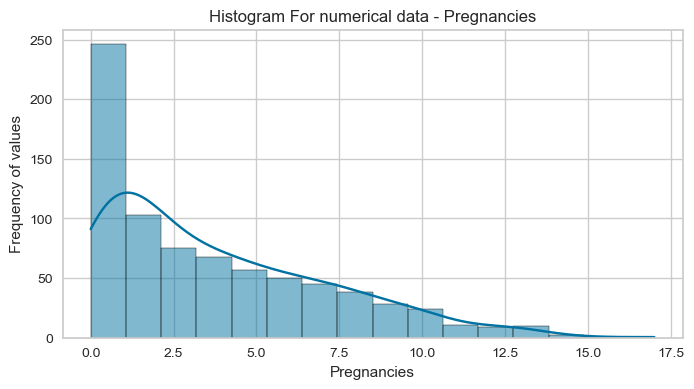

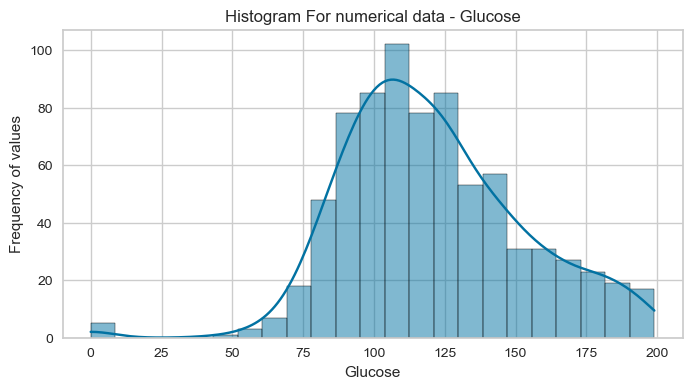

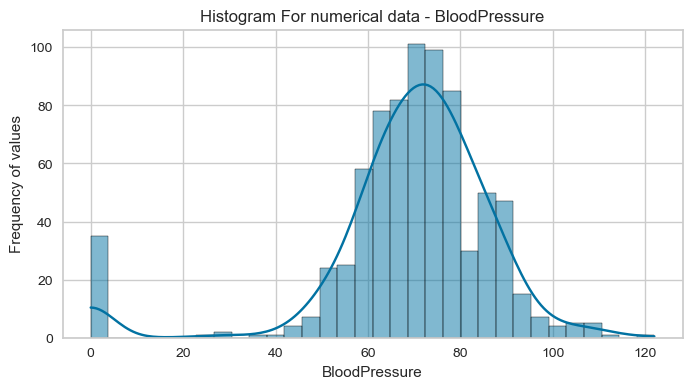

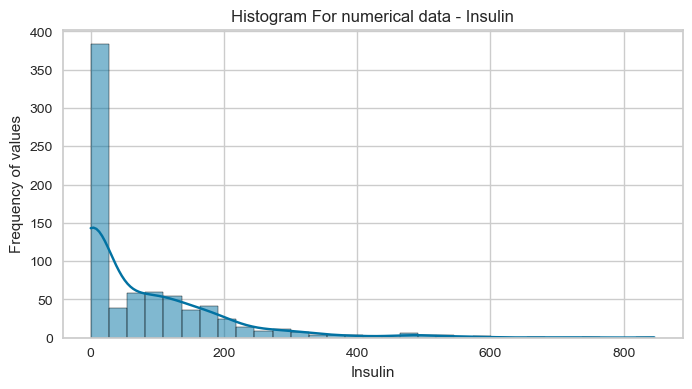

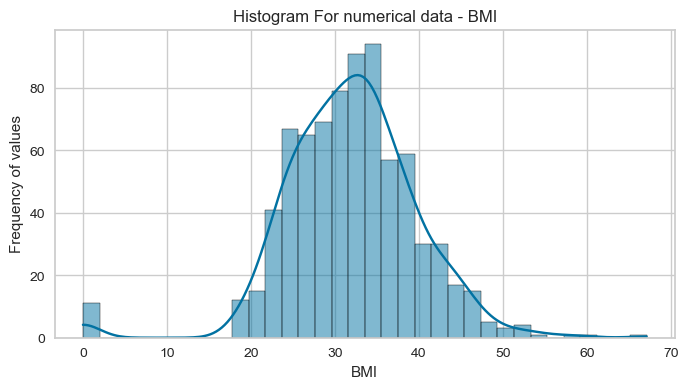

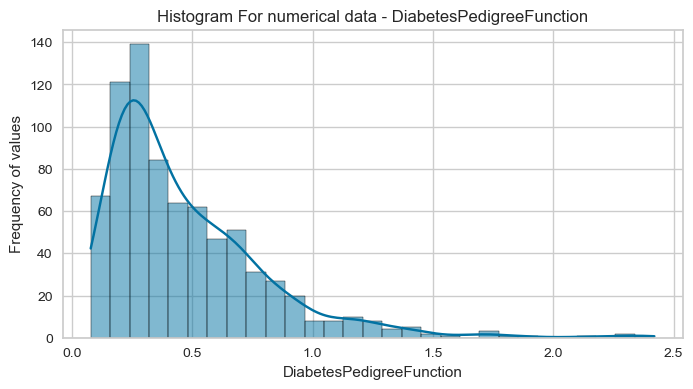

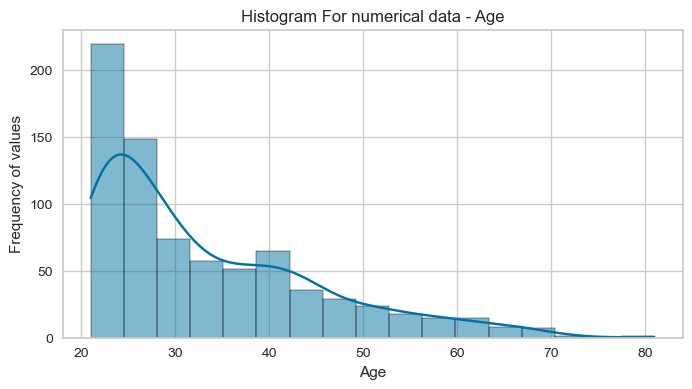

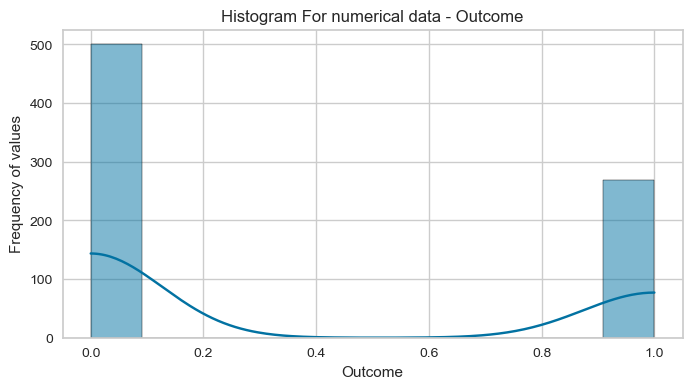

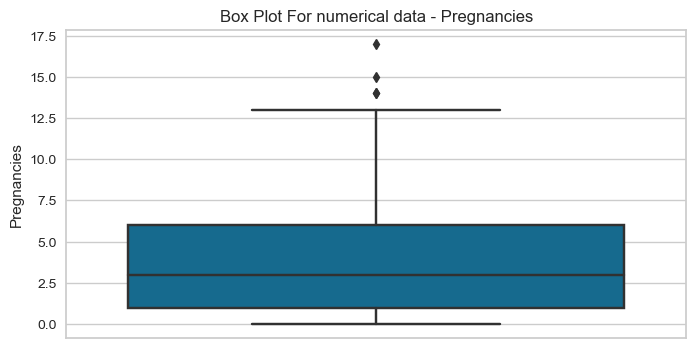

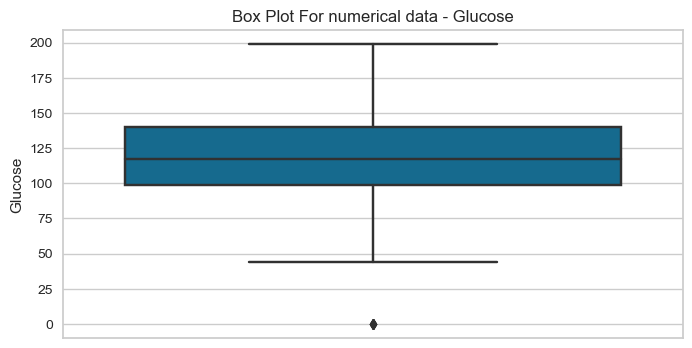

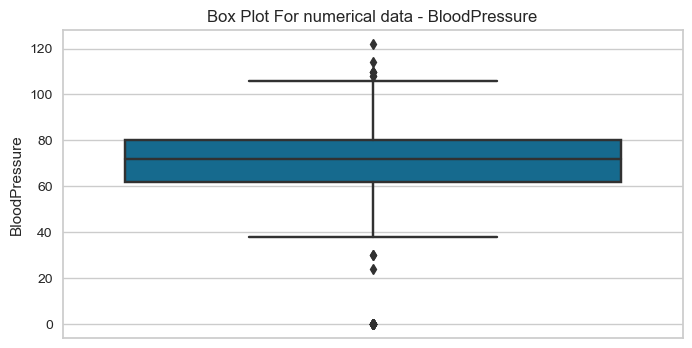

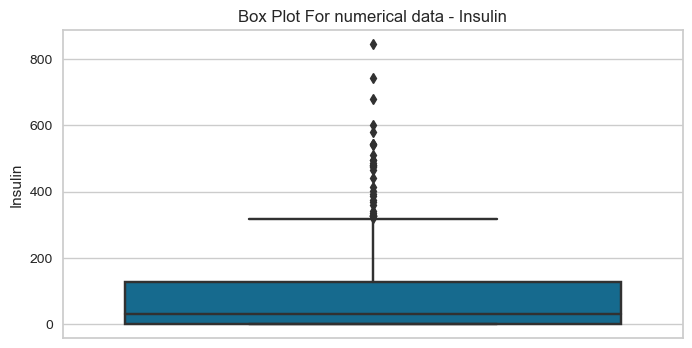

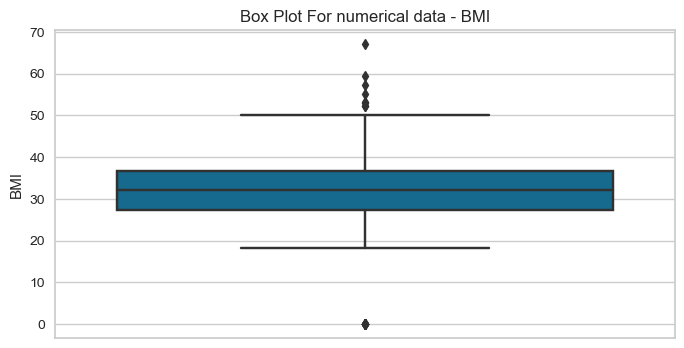

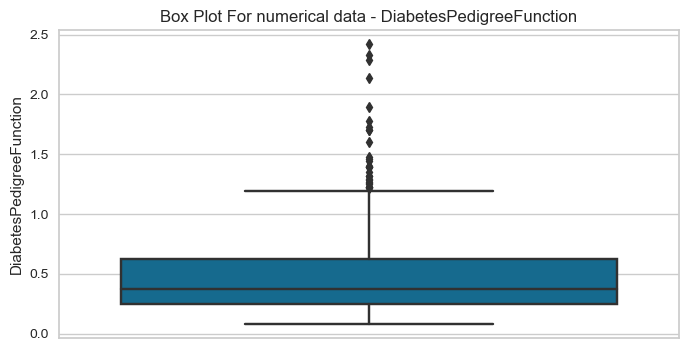

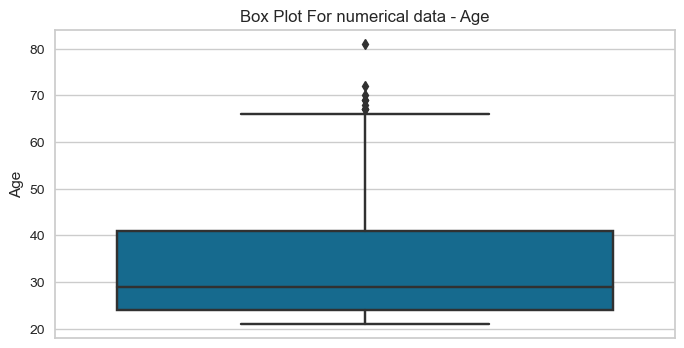

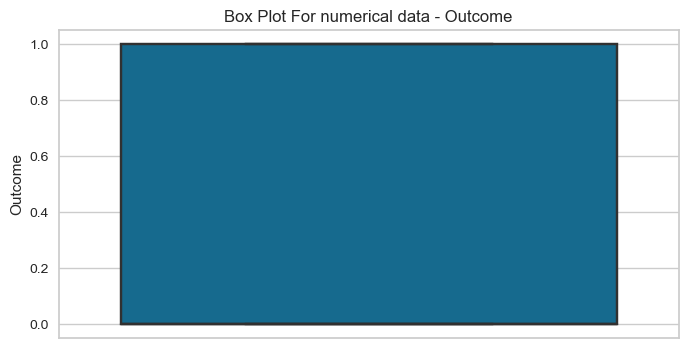

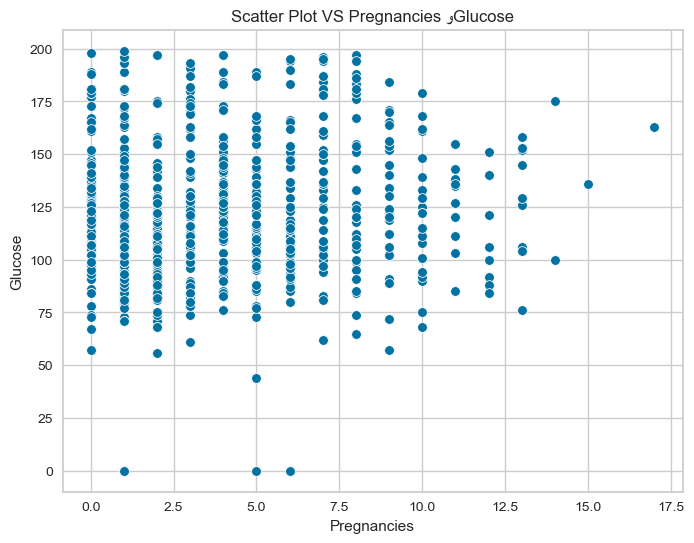

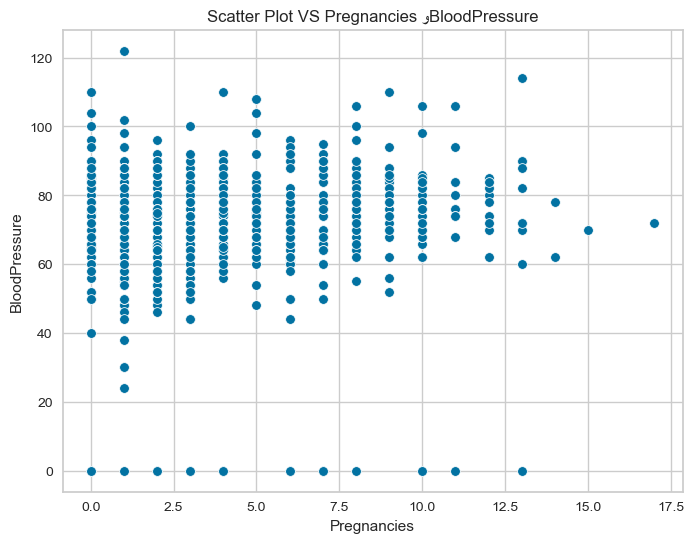

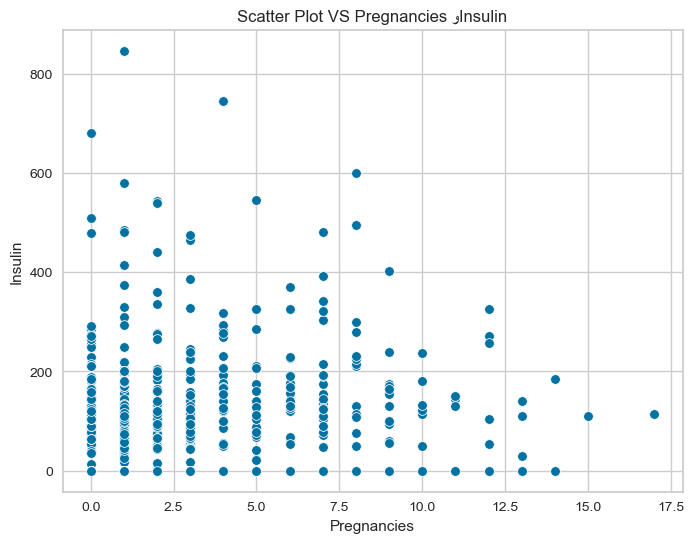

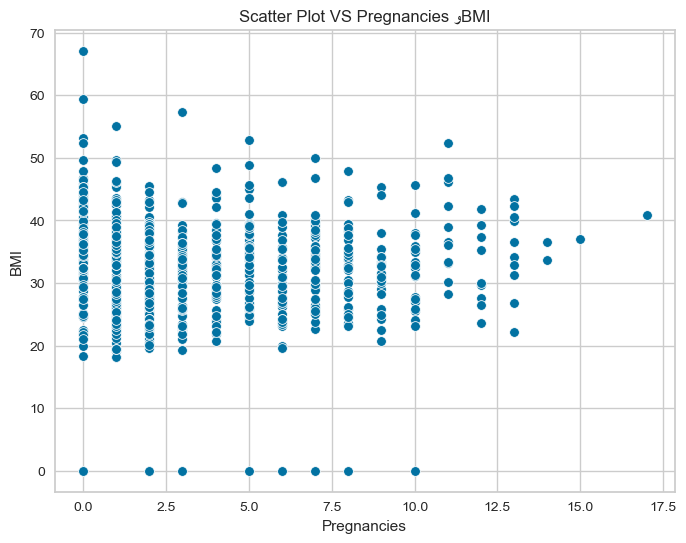

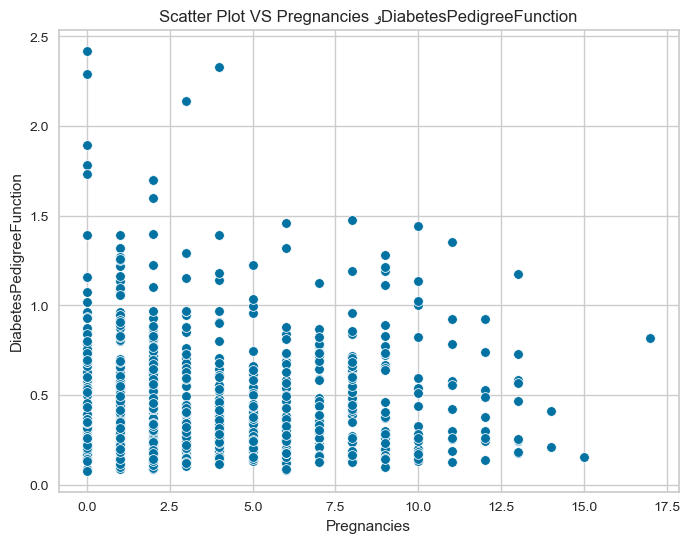

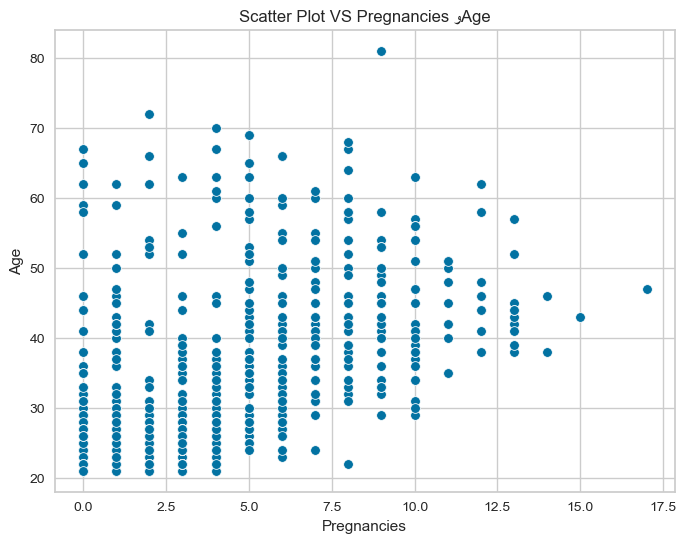

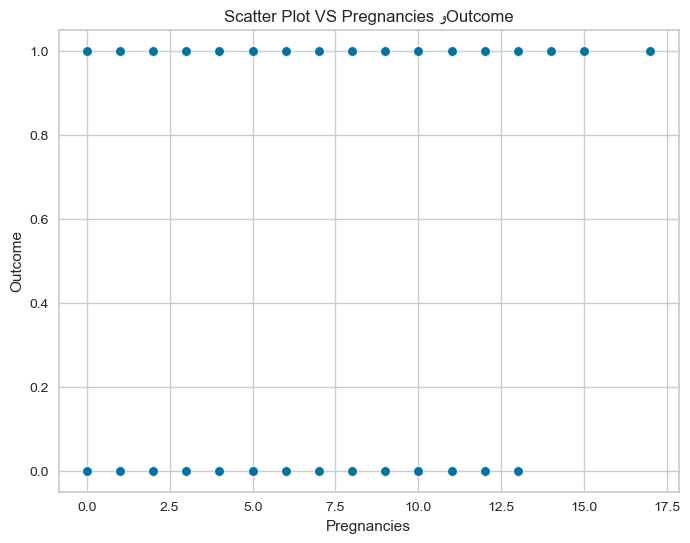

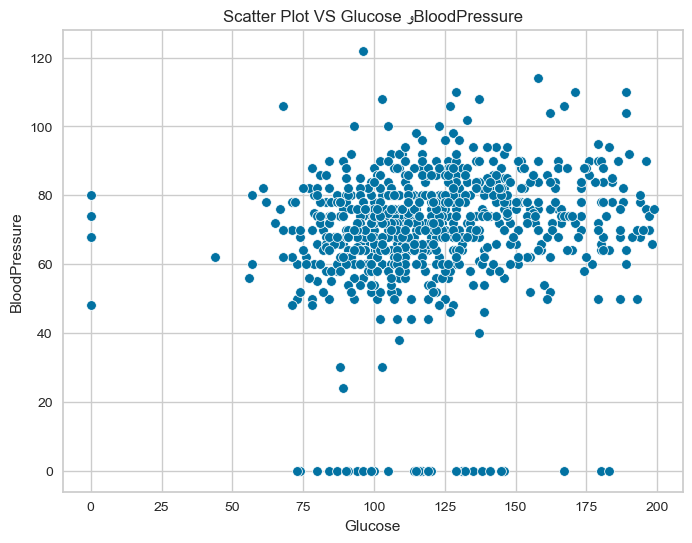

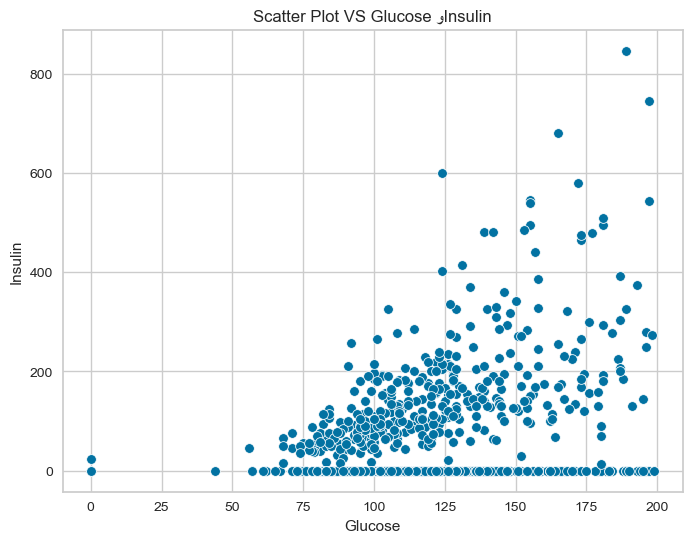

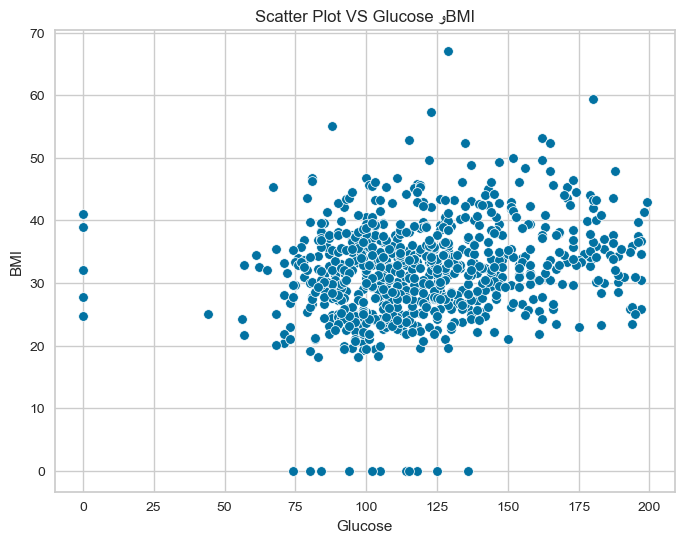

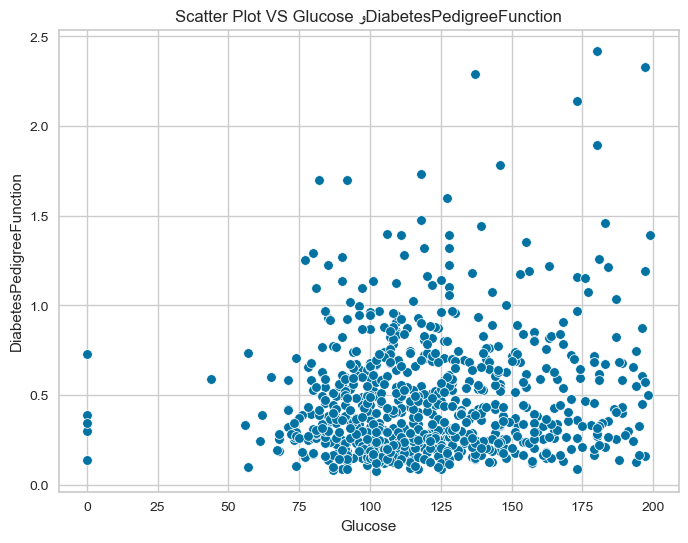

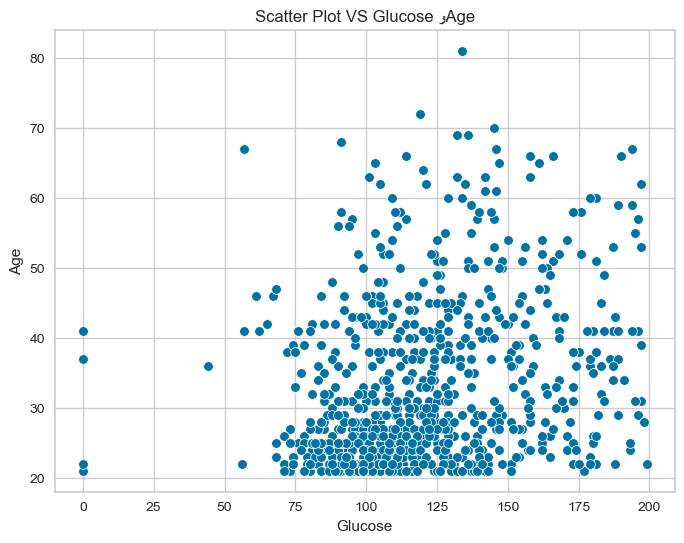

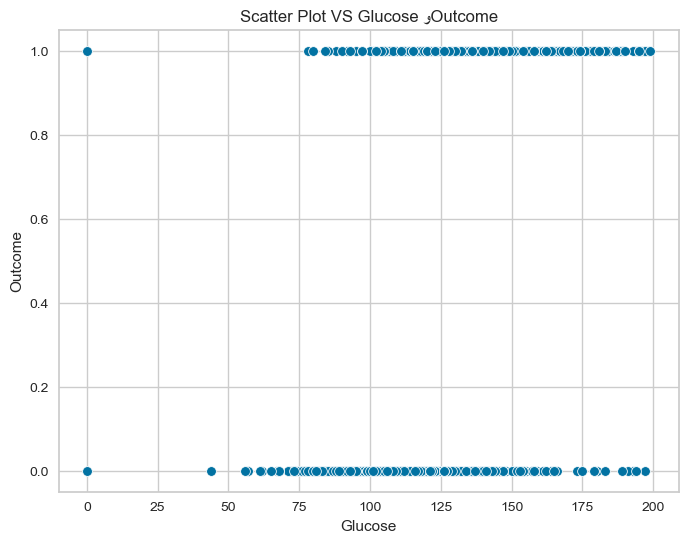

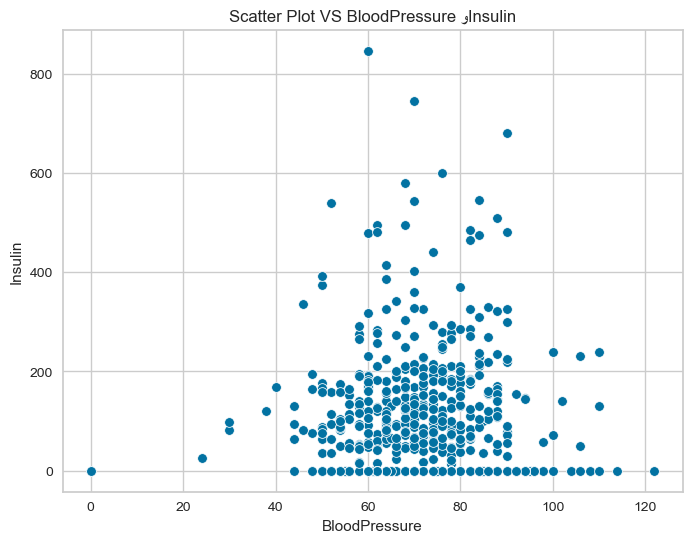

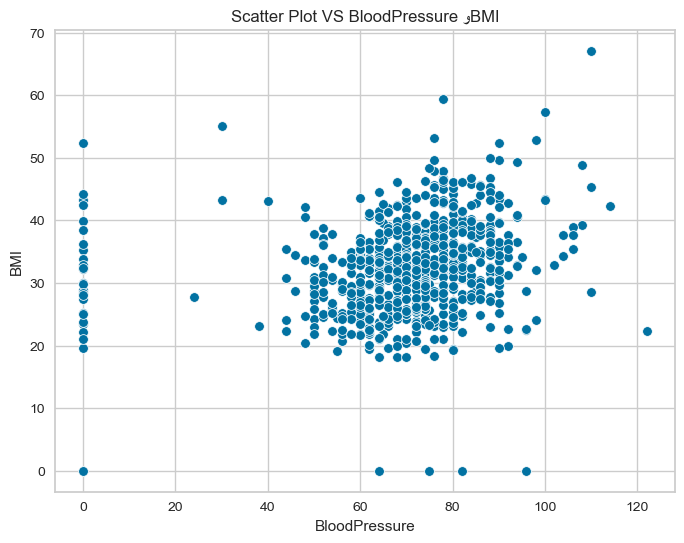

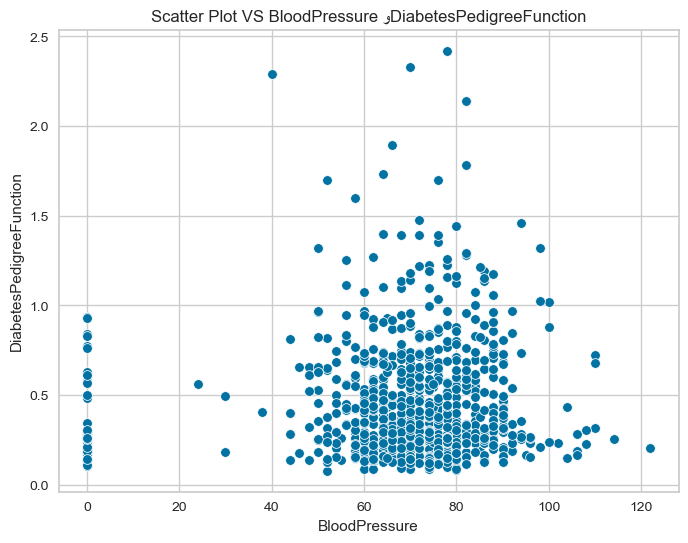

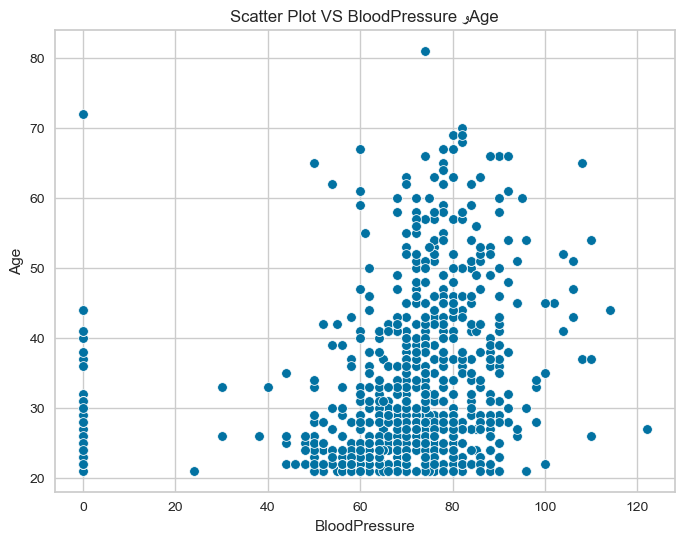

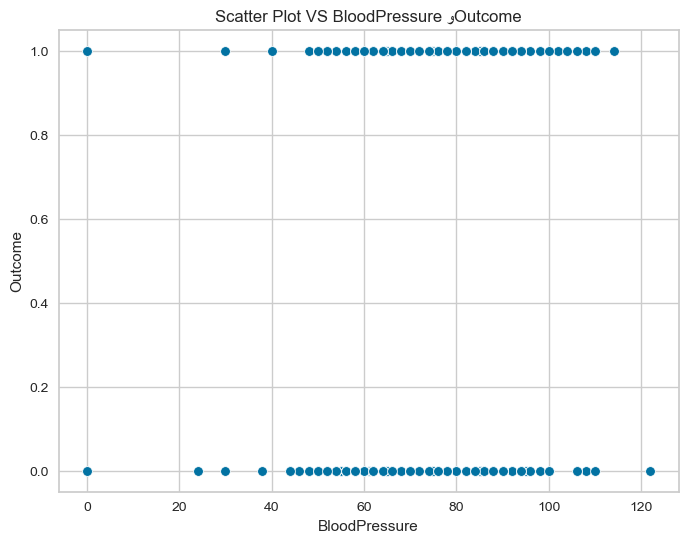

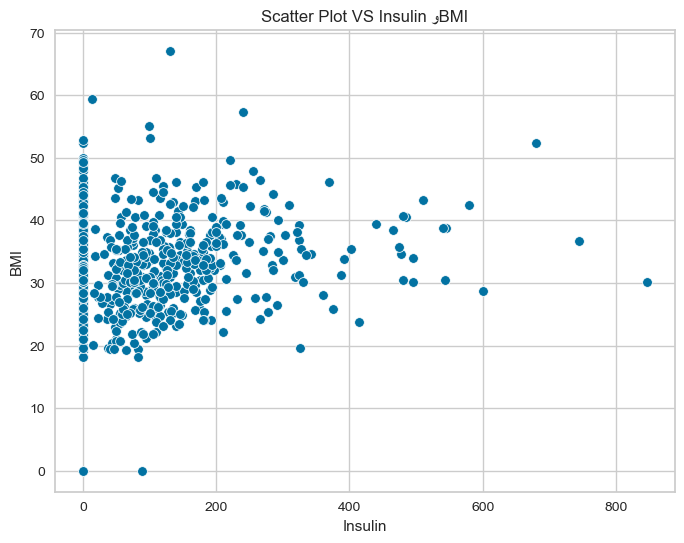

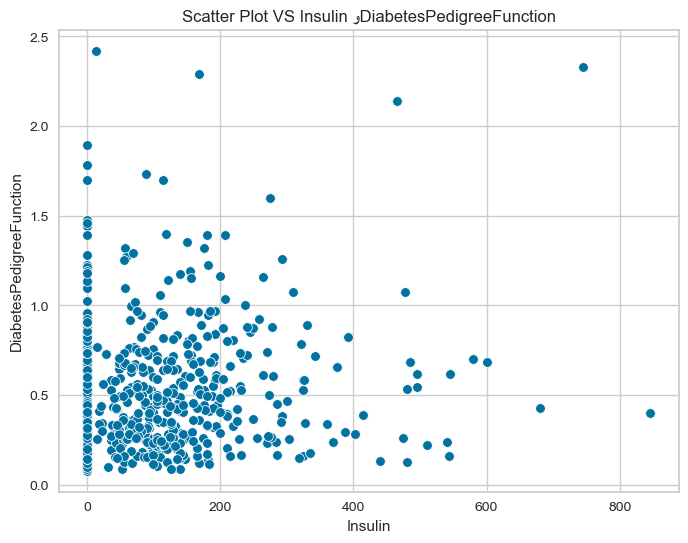

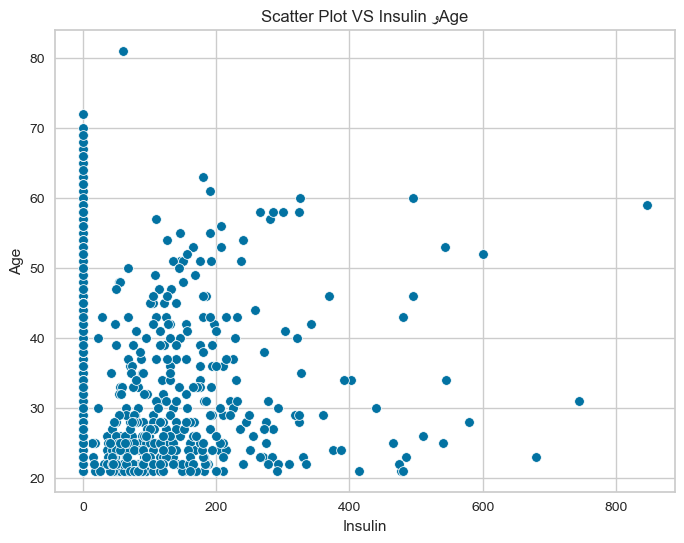

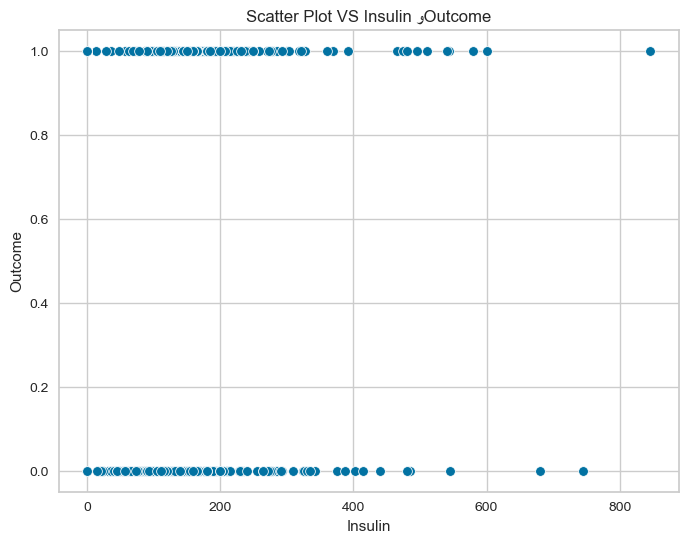

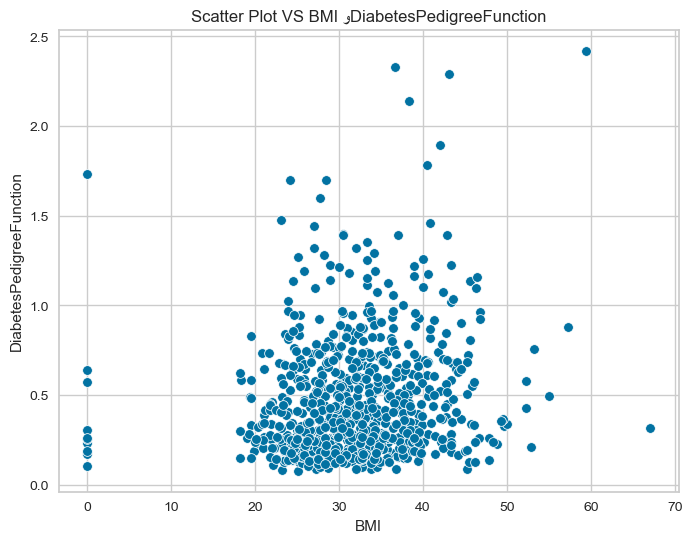

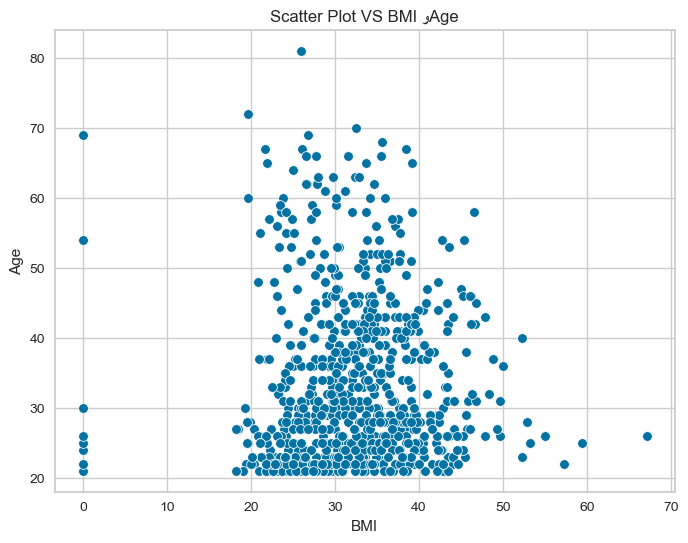

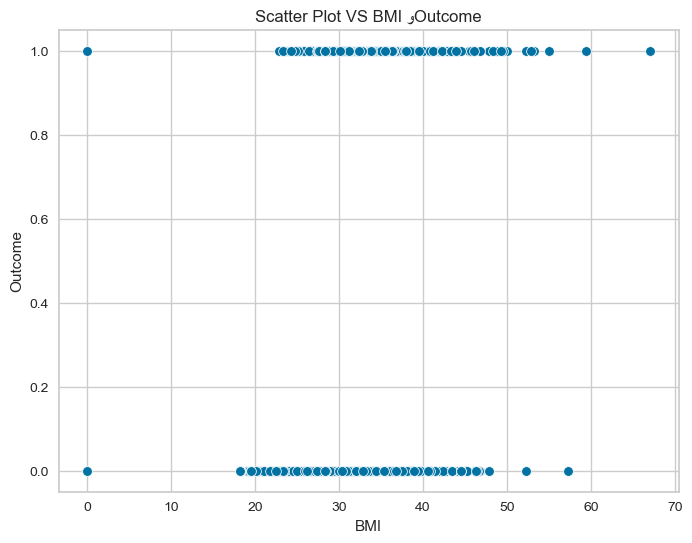

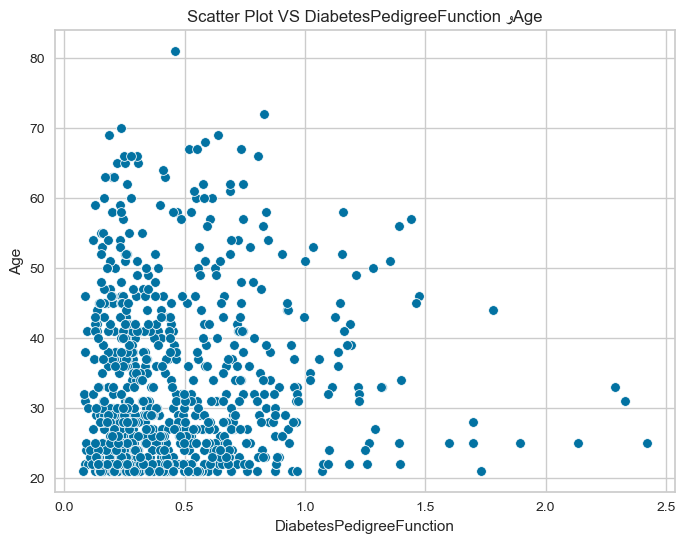

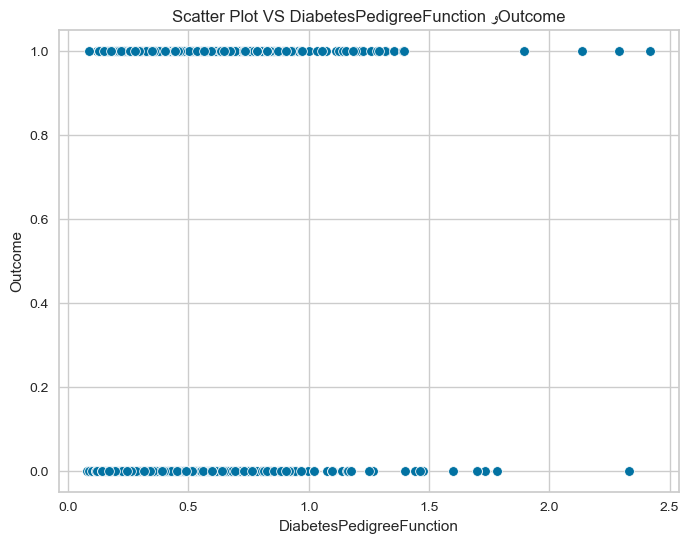

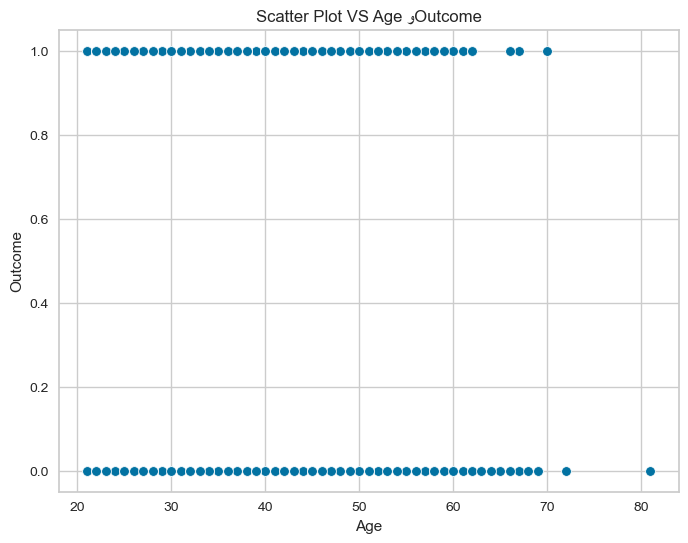

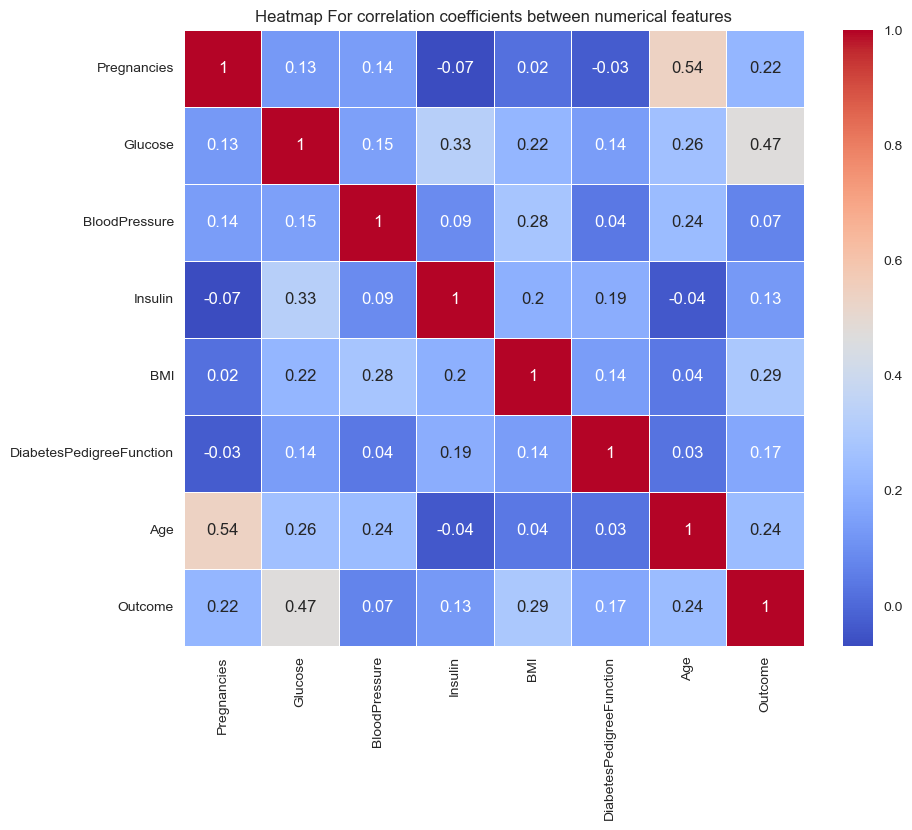

In [87]:
##8.Calling functions to draw visualizations
# استدعاء الدوال لرسم التصورات
plot_histograms(dataset)  # رسم histograms
plot_box_plots(dataset)  # رسم box plots
plot_scatter_plots(dataset)  # رسم scatter plots
plot_correlation_heatmap(dataset)   # رسم Heatmap لمعاملات الارتباط


In [88]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Seventh stage: Data processing
print('\n')
print('Seventh stage: Data processing.')
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>




Seventh stage: Data processing.


In [89]:
print('\n')
print('1. Handling missing values')
## 1. Handling missing values
handle_missing_values(dataset)  # فحص ومعالجة القيم المفقودة
# فحص القيم المفقودة في مجموعة البيانات
missing_values = check_missing_values(dataset)
print('OK, Missing values were processed successfully: ')
print('\n')
print(missing_values)





1. Handling missing values
OK, Missing values were processed successfully: 


Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [92]:
print('2.LabelCoding categorical data')

# العثور على الأعمدة من نوع 'object'
object_columns = dataset.select_dtypes(include=['object']).columns

# عرض أسماء الأعمدة من نوع 'object'
print("Column names of type 'object' that can be encoded:")
for col in object_columns:
    print(col)

2.LabelCoding categorical data
Column names of type 'object' that can be encoded:


In [93]:
# الحصول على المتغيرات المحددة من المستخدم
print('\n',' Enter the variables that you will encode.........')
selected_features = get_selected_features_from_user()

# التحقق من وجود متغيرات محددة
if not selected_features:
    encoded_data = dataset
    print('\n')
    print("No variables specified", "No variables of categorical type have been specified to be encoded.")
    print('\n')
else:
    # تنفيذ Label Encoding على المتغيرات المحددة
    encoded_data = label_encode_selected_features(dataset, selected_features)
    print("Encryption process", "The specified variables were successfully encrypted.")



  Enter the variables that you will encode.........
ادخل اسم المتغير (اضغط Enter للإنهاء): 


No variables specified No variables of categorical type have been specified to be encoded.




In [94]:
encoded_data 

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63,0
764,2,122,70,0,36.8,0.340,27,0
765,5,121,72,112,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


In [95]:

# 3. Examining and treating outliers in numerical data
print('\n')
print('3. Examining and treating outliers in numerical data')
print('\n')
print("Process all columns, No attributes are specified to handle outliers. All columns will be processed.")
selected_features = encoded_data.columns  # اختيار جميع الأعمدة
print(selected_features)   
# السماح للمستخدم بتحديد استراتيجية معالجة القيم المتطرفة
outlier_strategy = input("Choose a strategy for handling outliers (clip/replace/std): ")
# تنفيذ المعالجة باستخدام الاستراتيجية المحددة
data_numeric_no_outliers = handle_outliers_iqr(encoded_data[selected_features], outlier_strategy=outlier_strategy)
print('\n', 'Outlier data was processed successfully')
print("Processing process, Outlier data was processed successfully.")





3. Examining and treating outliers in numerical data


Process all columns, No attributes are specified to handle outliers. All columns will be processed.
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Choose a strategy for handling outliers (clip/replace/std): std

 Outlier data was processed successfully
Processing process, Outlier data was processed successfully.


In [96]:
data_numeric_no_outliers

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,0.0,33.6,0.627000,50.0,1
1,1.0,85.0,66.0,0.0,26.6,0.351000,31.0,0
2,8.0,183.0,64.0,0.0,23.3,0.672000,32.0,1
3,1.0,89.0,66.0,94.0,28.1,0.167000,21.0,0
4,0.0,137.0,40.0,168.0,43.1,1.288907,33.0,1
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,180.0,32.9,0.171000,63.0,0
764,2.0,122.0,70.0,0.0,36.8,0.340000,27.0,0
765,5.0,121.0,72.0,112.0,26.2,0.245000,30.0,0
766,1.0,126.0,60.0,0.0,30.1,0.349000,47.0,1


In [100]:
#4. transformation for numerical data

#توحيد قياس البيانات بواسطة transformation

transf_data = data_numeric_no_outliers.copy()

target_column = select_columns_target(transf_data)
print("The column to be predicted:", target_column)
print('\n')
transf_data.drop(columns = target_column, inplace=True)

# طلب من المستخدم اختيار نوع التحويل
while True:
    try:
        transformation_type = input("Choose the transformation type data (std/min_max/normalize): ").strip().lower()
        if transformation_type not in ["std", "min_max", "normalize"]:
            raise ValueError("Invalid transformation type. Please choose from 'std', 'min_max', or 'normalize'.")
        break  # إذا كان الإدخال صحيحًا، انهي الحلقة
    except ValueError as e:
        print(f"Error: {e}")
        print("Please try again.")

# تطبيق التحويل المحدد بواسطة المستخدم
transformed_data = apply_transformation(transf_data, transformation_type)

#  إعادة إضافة العمود المستهدف إلى مجموعة البيانات
temp_target = data_numeric_no_outliers[target_column]
transformed_data[target_column] = temp_target


Enter the name of the column you want to predict: Outcome
The column to be predicted: Outcome


Choose the transformation type data (std/min_max/normalize): normalize


In [101]:
# عرض البيانات المحولة
print("transformation data:")
transformed_data


transformation data:


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.650058,0.860781,0.111185,-0.766365,0.206604,0.559012,1.454845,1
1,-0.850037,-1.156882,-0.261954,-0.766365,-0.769234,-0.377603,-0.188234,0
2,1.250096,1.981705,-0.386334,-0.766365,-1.229271,0.711721,-0.101756,1
3,-0.850037,-1.028776,-0.261954,0.188970,-0.560126,-1.002013,-1.053012,0
4,-1.150056,0.508491,-1.878890,0.941042,1.530955,2.805216,-0.015278,1
...,...,...,...,...,...,...,...,...
763,1.850134,-0.644459,0.359945,1.063000,0.109020,-0.988438,2.579056,0
764,-0.550018,0.028095,-0.013194,-0.766365,0.652701,-0.414931,-0.534145,0
765,0.350039,-0.003931,0.111185,0.371906,-0.824996,-0.737317,-0.274712,0
766,-0.850037,0.156201,-0.635093,-0.766365,-0.281315,-0.384390,1.195411,1


In [102]:
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
# Ninth stage: training the model and evaluating the model
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

from pycaret.classification import *
from pycaret.classification import *


In [103]:

# استدعاء الدالة لتحديد العمود المستهدف وتحديد مهمة التنبؤ ونوع البيانات
target_column, task_type, target_data_type = get_target_info(transformed_data)

# عرض المعلومات التي تم تحديدها
if target_column and task_type and target_data_type:
    print(f"تم تحديد العمود المستهدف: {target_column}")
    print(f"نوع المهمة: {task_type}")
    print(f"نوع البيانات في العمود المستهدف: {target_data_type}")


Enter the name of the target column: Outcome
Enter the task type (regression/classification): classification
Enter the data type in the target column (numeric/discrete): discrete
Target column: 'Outcome', Task type: 'classification', Data type: 'discrete'. Confirm? (yes/no): yes
تم تحديد العمود المستهدف: Outcome
نوع المهمة: classification
نوع البيانات في العمود المستهدف: discrete


In [104]:

# تحديد نوع المهمة بناءً على نوع البيانات
if target_data_type.lower() == 'numeric':
    task_type_by_data = 'regression'
    if task_type.lower() == 'regression':
        from pycaret.regression import *
        s = setup(transformed_data, target = target_column, session_id = 123)
    else:
        print("Task does not match data type (regression).")
else:
    task_type_by_data = 'classification'
    if task_type.lower() == 'classification':
        setup_func = setup
        from pycaret.classification import *
        s = setup(transformed_data, target = target_column, session_id = 123)
    else:
        print("Task does not match data type (classification).")




,Description,Value
0,Session id,123
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 8)"
4,Transformed data shape,"(768, 8)"
5,Transformed train set shape,"(537, 8)"
6,Transformed test set shape,"(231, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [105]:
if task_type_by_data:
    exp1=s
    # تحليل البيانات وتحديد الخوارزمية الأفضل
    print('\n')
    print('Comparison of machine learning models')
    best_model = compare_models()




Comparison of machine learning models


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7800,0.8083,0.5813,0.7383,0.6474,0.4909,0.5004,2.8770
ridge,Ridge Classifier,0.7782,0.0000,0.5655,0.7449,0.6407,0.4841,0.4955,0.0260
lda,Linear Discriminant Analysis,0.7781,0.8072,0.5760,0.7370,0.6439,0.4862,0.4959,0.0410
nb,Naive Bayes,0.7502,0.8043,0.6076,0.6579,0.6269,0.4403,0.4448,0.0260
rf,Random Forest Classifier,0.7484,0.7964,0.5284,0.6780,0.5925,0.4149,0.4224,0.4310
qda,Quadratic Discriminant Analysis,0.7410,0.8044,0.5760,0.6609,0.6084,0.4168,0.4247,0.0340
et,Extra Trees Classifier,0.7317,0.7856,0.5120,0.6412,0.5678,0.3774,0.3831,0.3140
gbc,Gradient Boosting Classifier,0.7316,0.7947,0.5599,0.6318,0.5900,0.3922,0.3963,0.3130
ada,Ada Boost Classifier,0.7204,0.7768,0.5488,0.6148,0.5748,0.3683,0.3730,0.1390
knn,K Neighbors Classifier,0.7168,0.7569,0.5386,0.6163,0.5689,0.3600,0.3661,0.0470


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [106]:
print('\n')
print('best_model',best_model)



best_model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [107]:

print('\n')
print('evaluate best_model')
print(evaluate_model(best_model))




evaluate best_model


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

None


In [108]:
print('\n')
print('Comparing predicted values and actual values by the best model')
print(predict_model(best_model))



Comparing predicted values and actual values by the best model


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7403,0.8635,0.5185,0.6667,0.5833,0.3989,0.4056


     Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
552     0.650058 -0.228116       1.106223 -0.766365 -0.601947   
438    -0.850037 -0.772565      -0.013194 -0.766365 -1.940239   
149    -0.550018 -0.996750      -0.013194 -0.766365 -0.671650   
373    -0.550018 -0.516354      -0.759473  0.188970  0.387831   
36      2.150153  0.540517       0.359945 -0.766365  0.150842   
..           ...       ...            ...       ...       ...   
85     -0.550018 -0.356222       0.235565  0.504027  0.039318   
7       1.850134 -0.196090      -2.918184 -0.766365  0.443593   
298     2.671933 -0.676486       0.484325  1.103652  0.624820   
341    -0.850037 -0.836618       0.235565 -0.024456 -0.866817   
472    -1.150056 -0.067984      -0.261954 -0.766365  0.931512   

     DiabetesPedigreeFunction       Age  Outcome  prediction_label  \
552                 -0.730530  2.838490        0                 0   
438                 -1.069883 -1.053012        0                 0   
149      

In [109]:
predictions = predict_model(best_model, data=transformed_data)
predictions.head()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7799,0.8402,0.5746,0.7368,0.6457,0.4896,0.4976


,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
0,0.650058,0.860781,0.111185,-0.766365,0.206604,0.559012,1.454845,1,1,0.6982
1,-0.850037,-1.156881,-0.261954,-0.766365,-0.769234,-0.377603,-0.188234,0,0,0.9480
2,1.250096,1.981705,-0.386334,-0.766365,-1.229271,0.711721,-0.101756,1,1,0.8119
3,-0.850037,-1.028776,-0.261954,0.188970,-0.560126,-1.002012,-1.053012,0,0,0.9524
4,-1.150056,0.508491,-1.878890,0.941042,1.530955,2.805216,-0.015278,1,1,0.7777


In [110]:
save_model(best_model, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Glucose',
                                              'BloodPressure', 'Insulin', 'BMI',
                                              'DiabetesPedigreeFunction',
                                              'Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer'...
                                                         

In [111]:
loaded_model = load_model('my_best_pipeline')

Transformation Pipeline and Model Successfully Loaded
